In [30]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
%pwd

'C:\\Users\\Debjani Khan'

In [3]:
cd C:\Users\Debjani Khan\Downloads

C:\Users\Debjani Khan\Downloads


In [4]:
data=pd.read_csv("drug200.csv")

In [6]:
data[0:10]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [20]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [22]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [24]:
data.isna().sum()  
#No missing value
#6 columns
#200 rows

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [26]:
print("Max Age:", data.Age.max())
print("Min Age:", data.Age.min())

Max Age: 74
Min Age: 15


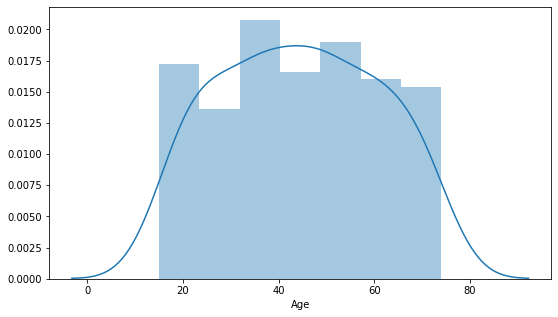

In [32]:
# Age distribution
plt.figure(figsize = (9,5))
sns.distplot(data.Age)
plt.show()

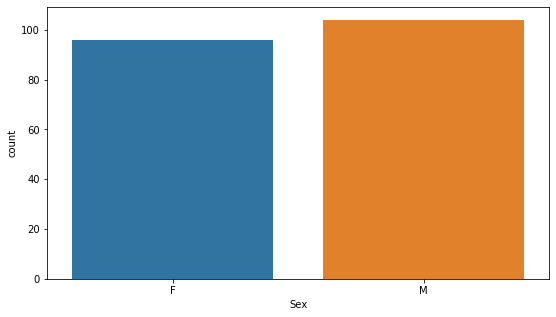

In [33]:
# Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = data.Sex)
plt.show()

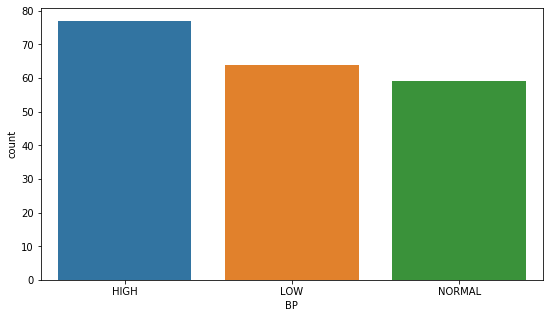

In [34]:
plt.figure(figsize = (9,5))
sns.countplot(data.BP)
plt.show()

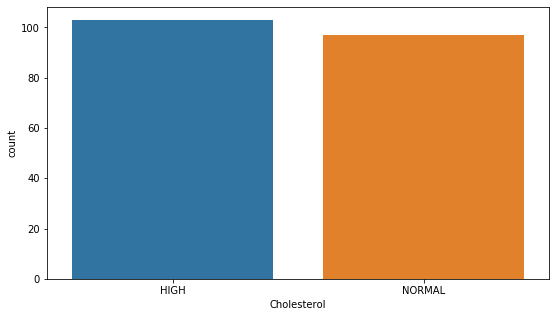

In [36]:
plt.figure(figsize = (9,5))
sns.countplot(data.Cholesterol)
plt.show()

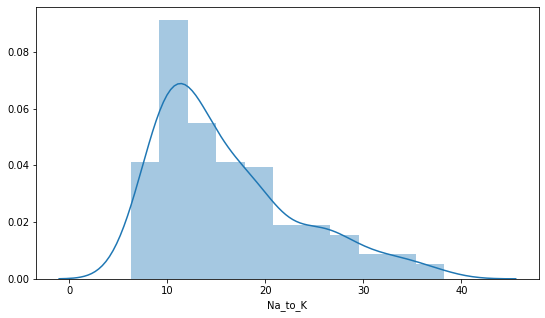

In [37]:
plt.figure(figsize = (9,5))
sns.distplot(data.Na_to_K)
plt.show()

In [8]:
x = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [9]:
from sklearn import preprocessing
sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
x[:,1] = sex.transform(x[:,1]) 


BP = preprocessing.LabelEncoder()
BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = BP.transform(x[:,2])


Chol = preprocessing.LabelEncoder()
Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = Chol.transform(x[:,3]) 

x[0:10]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607000000000001],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368]], dtype=object)

In [10]:
y = data["Drug"]
y[0:10]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
5    drugX
6    drugY
7    drugC
8    drugY
9    drugY
Name: Drug, dtype: object

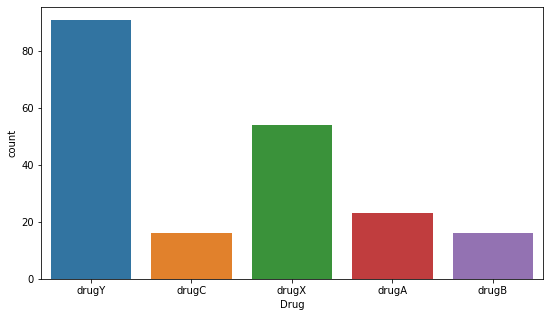

In [38]:
plt.figure(figsize = (9,5))
sns.countplot(data.Drug)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [12]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
pt = dt.predict(x_test)
print(pt[0:5])
print(y_test[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [15]:
from sklearn import metrics
print("Accuracy of the decision tree: ", metrics.accuracy_score(y_test,pt))

Accuracy of the decision tree:  0.9833333333333333


In [18]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

Train Score: 0.9654036525004266
Test Score: 0.9833333333333333


C:\Users\Debjani Khan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Debjani Khan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Debjani Khan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Debjani Khan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Debjani Khan\Anaconda3\lib\site-package